## CNN

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# First Method
# x_train_f = x_train.reshape(-1, 28, 28, 1)
# x_test_f = x_test.reshape(-1, 28, 28, 1)

# Second Method
x_train_f = np.expand_dims(x_train, axis=-1)
x_test_f = np.expand_dims(x_test, axis=-1)

In [6]:
x_train_f.shape, x_test_f.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
from keras.utils import to_categorical
num_classes = 10

y_train_f = to_categorical(y_train, num_classes)
y_test_f = to_categorical(y_test, num_classes)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [9]:
model = Sequential()
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1744      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 16)                36880     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                        

In [11]:
# filters * (weights + biases) = 12 * (3*3 + 1) = 12 * (9 + 1) = 120

In [12]:
model.layers[0].weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 12) dtype=float32, numpy=
 array([[[[ 0.19005941,  0.12967207, -0.16502878, -0.18507992,
           -0.07035947,  0.04761817,  0.00102934, -0.01151113,
           -0.14696641,  0.06104492, -0.19564718,  0.16265048]],
 
         [[-0.10186019, -0.03496917,  0.20707192,  0.21265452,
            0.15642674, -0.20161125, -0.08845261,  0.02510853,
            0.10793133,  0.1991267 , -0.08545318, -0.18011516]],
 
         [[-0.19060327, -0.06805356,  0.00596958,  0.19463144,
            0.11935668, -0.21407172, -0.00225888, -0.1485813 ,
            0.06096868,  0.04336496, -0.09304187, -0.22401392]]],
 
 
        [[[-0.07991925,  0.16037942, -0.10929828,  0.20832108,
            0.07734613,  0.01532301, -0.08017273,  0.17904104,
            0.0325955 ,  0.1242062 , -0.06916146,  0.02401079]],
 
         [[ 0.01937689,  0.17673363, -0.00746703, -0.1787515 ,
            0.09808673, -0.06833108,  0.17218094,  0.12518372,
           -0.13090008,  

In [13]:
model.fit(x_train_f, y_train_f, batch_size=128, epochs=10, validation_data=(x_test_f, y_test_f))

Epoch 1/10
469/469 [==============================] - 7s 6ms/step - loss: 0.3657 - accuracy: 0.8901 - val_loss: 0.1174 - val_accuracy: 0.9650
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1054 - accuracy: 0.9686 - val_loss: 0.0756 - val_accuracy: 0.9775
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0767 - accuracy: 0.9768 - val_loss: 0.0771 - val_accuracy: 0.9751
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0615 - accuracy: 0.9812 - val_loss: 0.0571 - val_accuracy: 0.9812
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0518 - accuracy: 0.9843 - val_loss: 0.0547 - val_accuracy: 0.9825
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0445 - accuracy: 0.9862 - val_loss: 0.0490 - val_accuracy: 0.9842
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.0466 - val_accuracy: 0.9855
Epoch

In [14]:
y_pred = model.predict(x_test_f)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_pred.shape

(10000, 10)

In [16]:
y_pred[0]

array([1.40859191e-08, 1.16479235e-07, 2.24907481e-07, 9.00949601e-07,
       1.52073298e-10, 9.81047021e-10, 2.18018406e-16, 9.99998569e-01,
       1.55499347e-08, 4.92845835e-08], dtype=float32)

In [17]:
y_pred[0].sum() # softmax

0.9999999

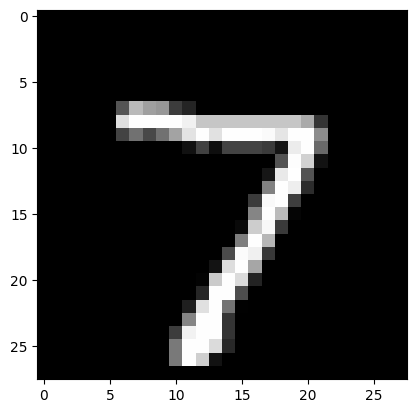

In [18]:
plt.imshow(x_test[0], cmap='gray')

In [19]:
def gridshow(x, y, n=5, mislabeled=False, yp=None):
  if not mislabeled:
    grid = np.random.randint(0, len(x), size=(n, n))
  else:
    wrong_labels = np.where(yp != y_test)[0]
    grid = np.random.choice(wrong_labels, size=n**2)
    grid = grid.reshape(n, n)


  fig, ax = plt.subplots(ncols=n, nrows=n, figsize=(2*n, 2*n))
  for i in range(n):
    for j in range(n):
      ax[i][j].imshow(x[grid[i, j]], cmap='gray')
      ax[i][j].axis('off')
      label = "y = " + str({y[grid[i][j]]})
      if yp is not None:
        label += " | yp = " + str({yp[grid[i][j]]})
      ax[i][j].set_title(label)
    # plt.tight_layout()
  if yp is not None:
    count = y[np.squeeze(grid)] == yp[np.squeeze(grid)]
    count = count.astype('int')
    count = np.count_nonzero(count)
    print(f"{count} correct predictions out of {n*n} samples.")

In [20]:
y_pred = np.argmax(y_pred, 1)

25 correct predictions out of 25 samples.


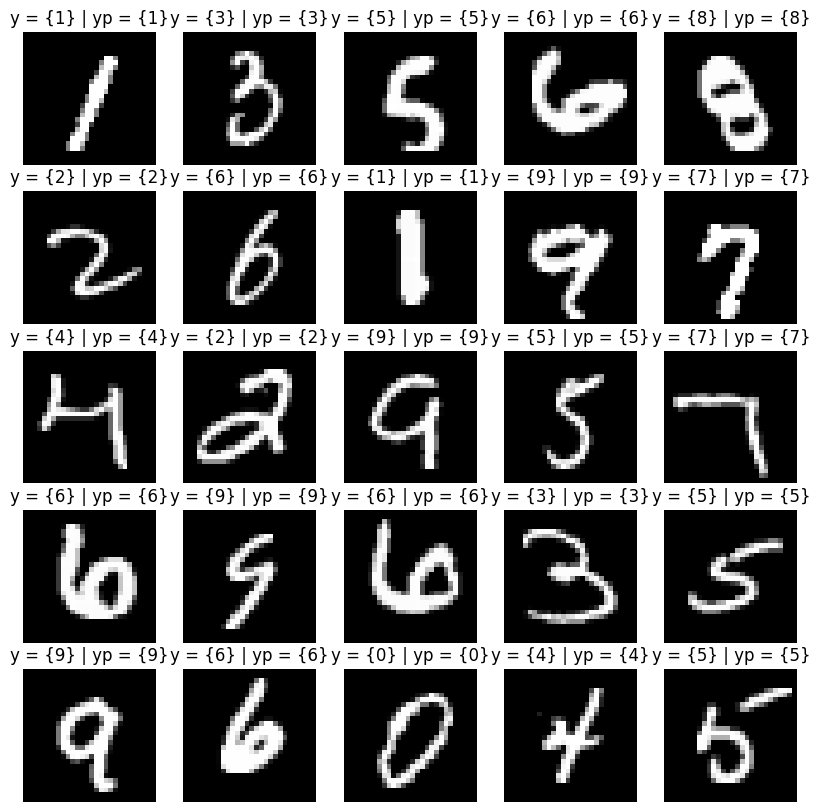

In [21]:
gridshow(x_test, y_test, yp=y_pred, mislabeled=False)

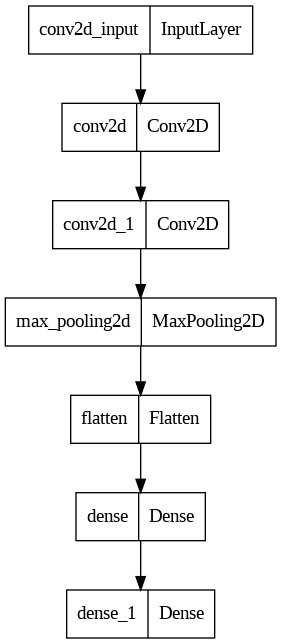

In [24]:
from keras.utils import plot_model
plot_model(model)

## CNN Outputs

In [25]:
model

In [26]:
type(model)

keras.src.engine.sequential.Sequential

In [27]:
model.layers

In [28]:
first_conv = model.layers[0]
first_conv

In [29]:
first_conv.activation

<function keras.src.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>

In [30]:
first_conv.filters

12

In [31]:
first_conv.count_params()

120

In [32]:
first_conv.weights[0].numpy().shape

(3, 3, 1, 12)

In [33]:
first_conv.weights[0].numpy()

array([[[[ 0.46093452,  0.28039637, -0.5917449 , -0.0827463 ,
          -0.19883609,  0.04517274,  0.00211991,  0.00758829,
          -0.2777679 ,  0.23790693, -0.36074385,  0.27250198]],

        [[ 0.17502877,  0.03778756,  0.22270757,  0.40074173,
           0.3023611 , -0.47582784, -0.11678926,  0.04176866,
           0.1407195 ,  0.5380425 ,  0.177623  , -0.15319009]],

        [[ 0.04731036, -0.06231477,  0.16905384,  0.44840354,
           0.38658586, -0.48705286, -0.01207638, -0.14981236,
           0.15608616,  0.21429776,  0.37162462, -0.4743655 ]]],


       [[[ 0.05981989,  0.45585835, -0.17875414,  0.17761824,
           0.2301666 ,  0.21409447, -0.05240634,  0.46889323,
          -0.16060494,  0.3030849 , -0.36829248,  0.27949843]],

        [[ 0.19460757,  0.38695478,  0.09015727, -0.1913722 ,
           0.23379628,  0.03471335,  0.24800247,  0.39961642,
          -0.02125324,  0.2614575 , -0.57349265,  0.25388747]],

        [[ 0.27303666,  0.00931063, -0.08946234, -0.0

In [34]:
x_test_f.shape

(10000, 28, 28, 1)

In [35]:
layers_output = []
out = x_test_f.copy()
out.shape

(10000, 28, 28, 1)

In [36]:
# floor ( (n + 2 * p - f) / s + 1 )
first_conv(x_test_f).shape

TensorShape([10000, 26, 26, 12])

In [37]:
for layer in model.layers:
  out = layer(out)
  print(out.shape)
  layers_output.append(out)

(10000, 26, 26, 12)
(10000, 24, 24, 16)
(10000, 12, 12, 16)
(10000, 2304)
(10000, 16)
(10000, 10)


In [38]:
n = 10 # the nth image in the test set

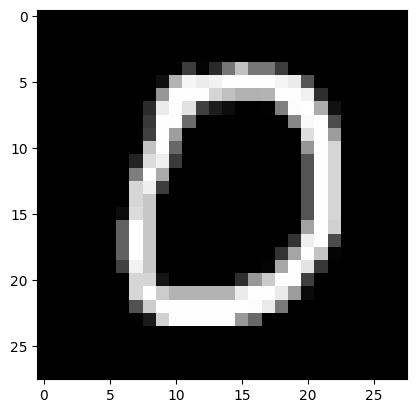

In [39]:
plt.imshow(x_test[n], cmap='gray')

In [40]:
layers_output[0].shape

TensorShape([10000, 26, 26, 12])

In [41]:
# First layer output
current_layer_output = layers_output[0][n]

In [42]:
current_layer_output.shape

TensorShape([26, 26, 12])

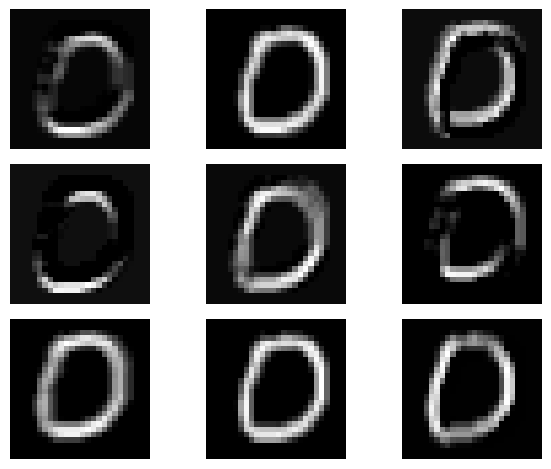

In [43]:
fig, ax = plt.subplots(3, 3)
for i in range(9):
  ax[i // 3][i % 3].imshow(current_layer_output[:, :, i], cmap='gray')
  ax[i // 3][i % 3].axis('off')
plt.tight_layout()

(24, 24, 16)


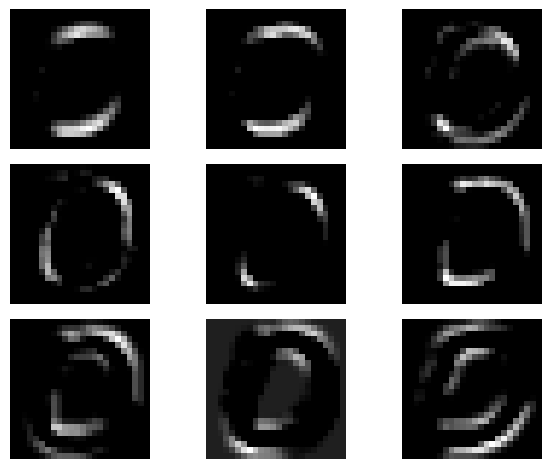

In [44]:
# Second layer output
current_layer_output = layers_output[1][n]
print(current_layer_output.shape)
fig, ax = plt.subplots(3, 3)
for i in range(9):
  ax[i // 3][i % 3].imshow(current_layer_output[:, :, i], cmap='gray')
  ax[i // 3][i % 3].axis('off')
plt.tight_layout()

(12, 12, 16)


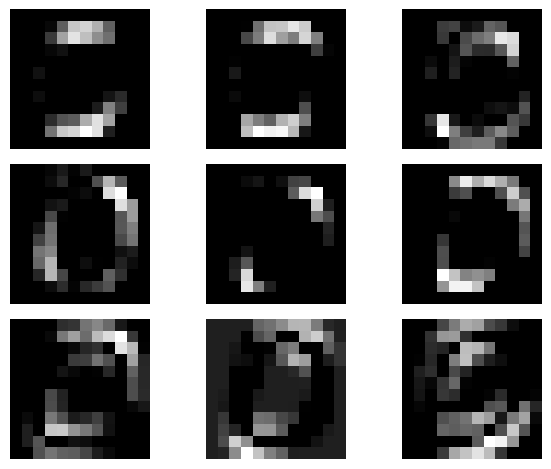

In [45]:
# Third layer output
current_layer_output = layers_output[2][n]
print(current_layer_output.shape)
fig, ax = plt.subplots(3, 3)
for i in range(9):
  ax[i // 3][i % 3].imshow(current_layer_output[:, :, i], cmap='gray')
  ax[i // 3][i % 3].axis('off')
plt.tight_layout()

In [46]:
layers_output[4][n]

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([ 3.2488787 ,  0.        ,  9.77296   , 19.20738   ,  0.        ,
        0.91580296, 17.903854  ,  0.        , 24.42079   , 12.673454  ,
       15.125948  , 14.81032   ,  0.        ,  0.        ,  5.9694877 ,
       14.572067  ], dtype=float32)>

In [47]:
layers_output[5][n]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.0000000e+00, 8.2568046e-16, 1.3919668e-10, 3.3130616e-14,
       1.0836736e-22, 2.5818644e-10, 1.2123624e-09, 3.7475228e-14,
       9.4785169e-10, 9.5339869e-09], dtype=float32)>